### problem statement & data description

***Problem Description***

***Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.***


***Data Description***

***The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:***


##### Date : year-month-day
##### Rented Bike count - Count of bikes rented at each hour
##### Hour - Hour of he day
##### Temperature-Temperature in Celsius
##### Humidity - %
##### Windspeed - m/s
##### Visibility - 10m
##### Dew point temperature - Celsius
##### Solar radiation - MJ/m2
##### Rainfall - mm
##### Snowfall - cm
##### Seasons - Winter, Spring, Summer, Autumn
##### Holiday - Holiday/No holiday
##### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('SeoulBikeData.csv')
df.head()

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

***statistical information about data sets***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.corr()

Rented Bike Count      Hour  Temperature(�C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(�C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(�C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(�C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(�C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(�C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(�C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(�C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(�C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(�C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

In [5]:
df.std()

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(�C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(�C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

In [6]:
df.describe()

Rented Bike Count         Hour  Temperature(�C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

 **This Dataset contains 8760 lines and 14 columns. In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.**

## preprocessing the datasets
***why we handle the missing values?***

***it is important to handle the missing values cause many of machine learning model does not support missing values and it fail if missing values contain***


### missing values

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<AxesSubplot:>

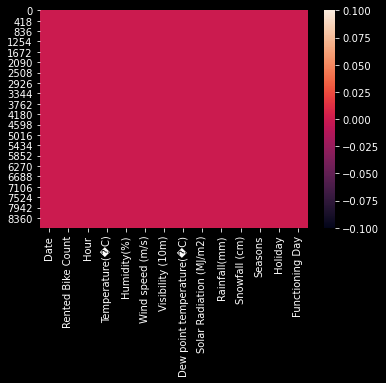

In [8]:
na=df.isnull()
sns.heatmap(data=na)

### changing the column name

In [9]:
df=df.rename(columns={'Rented Bike Count':'bike_count','Temperature(�C)':'temp','Humidity(%)':'hum','Wind speed (m/s)':'wind',
                      'Visibility (10m)':'visibility','Dew point temperature(�C)':'dew-temp','Solar Radiation (MJ/m2)':'solar-rad',
                     'Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall'})

In [10]:
df.sample(5)

Date  bike_count  Hour  temp  hum  wind  visibility  dew-temp  \
4819  19/06/2018        2809    19  23.3   59   2.6        1214      14.8   
4126  21/05/2018        1832    22  16.9   65   0.3        1281      10.2   
515   22/12/2017         278    11   3.1   57   0.8         804      -4.6   
4147  22/05/2018          45    19  17.6   93   0.3         331      16.4   
3249  15/04/2018         513     9   8.6   66   1.7         881       2.5   

      solar-rad  rainfall  snowfall Seasons     Holiday Functioning Day  
4819       0.28       0.0       0.0  Summer  No Holiday             Yes  
4126       0.00       0.0       0.0  Spring  No Holiday             Yes  
515        0.63       0.0       0.0  Winter     Holiday             Yes  
4147       0.06       1.5       0.0  Spring     Holiday             Yes  
3249       1.16       0.0       0.0  Spring  No Holiday             Yes

### Breaking the date columns

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.day_name()
df['months']=df['Date'].dt.month_name()
df['year']=df['Date'].dt.year

In [12]:
df['weakend']=df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [13]:
df.drop(columns=['Date','year'],axis=1,inplace=True)
df.sample(10)

bike_count  Hour  temp  hum  wind  visibility  dew-temp  solar-rad  \
2382          74     6   1.1   78   1.1         538      -2.3       0.00   
5867         547    11  35.3   45   1.7        1829      21.5       2.27   
701           52     5  -1.2   81   0.8         258      -4.0       0.00   
8302         690    22   7.0   60   0.0        1948      -0.2       0.00   
5657        1297    17  34.9   51   2.2        1235      23.2       0.98   
4102        1325    22  16.8   29   1.2        2000      -1.3       0.00   
5961         614     9  28.4   87   1.7        1313      26.0       0.56   
284          260    20  -8.4   42   1.0        2000     -19.0       0.00   
2730         736    18   9.0   76   3.0         288       4.9       0.45   
6433         769     1  22.5   80   0.6        2000      18.8       0.00   

      rainfall  snowfall Seasons     Holiday Functioning Day        day  \
2382       0.0       0.0  Spring  No Holiday             Yes  Wednesday   
5867       0.0       0.0  Summer  No Holiday             Yes   Thursday   
701        0.0       0.0  Winter  No Holiday             Yes   Saturday   
8302       0.0       0.0  Autumn  No Holiday             Yes     Sunday   
5657       0.0       0.0  Summer  No Holiday             Yes    Tuesday   
4102       0.0       0.0  Spring  No Holiday             Yes     Sunday   
5961       4.0       0.0  Summer  No Holiday             Yes     Friday   
284        0.0       0.0  Winter  No Holiday             Yes    Tuesday   
2730       0.0       0.0  Spring  No Holiday             Yes   Saturday   
6433       0.0       0.0  Summer  No Holiday             Yes     Sunday   

        months  weakend  
2382   October        0  
5867  February        0  
701   December        1  
8302  November        1  
5657      July        0  
4102       May        1  
5961      June        0  
284   December        0  
2730     March        1  
6433    August        1

In [14]:
df.duplicated().sum()

0

In [15]:
for i in df.columns:
    print('columns',i)
    print(df[i].unique())

columns bike_count
[ 254  204  173 ... 1538  804  595]
columns Hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
columns temp
[ -5.2  -5.5  -6.   -6.2  -6.4  -6.6  -7.4  -7.6  -6.5  -3.5  -0.5   1.7
   2.4   3.    2.1   1.2   0.8   0.6   0.   -0.3  -0.8  -0.9  -1.3  -1.8
  -2.2  -2.9  -3.8  -4.   -4.3  -4.4  -4.2  -0.4   1.9   4.3   6.    7.3
   7.6   6.4   5.5   5.    4.6   4.1   3.5   4.    3.9   3.3   3.4   3.1
   3.2   4.4   5.1   5.8   6.8   8.    6.7   5.7   5.2   4.7   4.2   3.6
   2.8   2.    0.2  -1.5  -1.1   0.1  -0.1  -0.2  -2.1  -3.6  -4.6  -5.3
  -5.8  -6.1  -6.8  -6.9  -7.2  -7.5  -8.1  -3.9  -2.3  -1.6  -0.7  -2.6
  -3.2  -3.7  -2.8  -2.5  -3.   -3.4  -3.3   1.6   5.3   1.1   1.3   1.4
   1.5   1.    0.3   2.3   3.7   0.7  -1.4  -2.7  -4.8  -7.   -6.7  -2.
  -1.7  -2.4  -3.1  -4.1  -4.7  -5.1  -5.4   2.5   0.4   0.5   0.9   5.4
  -1.   -5.6  -5.9  -7.1  -7.9  -8.6  -9.3  -9.7 -10.2 -10.7 -11.  -11.2
 -11.5 -11.6 -11.8 -12.1 -12.3 -10.5  -9.4 

## EDA(exploratory data analysis)

## Why do we perform EDA?

***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

### Univariate Analysis

### Why do you do univariate analysis?

***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***


## Analysis of Dependent Variable:

### What is a dependent variable in data analysis?

***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***


### Analysation of categorical variables
***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type***

### univariet and byvariet analysis 

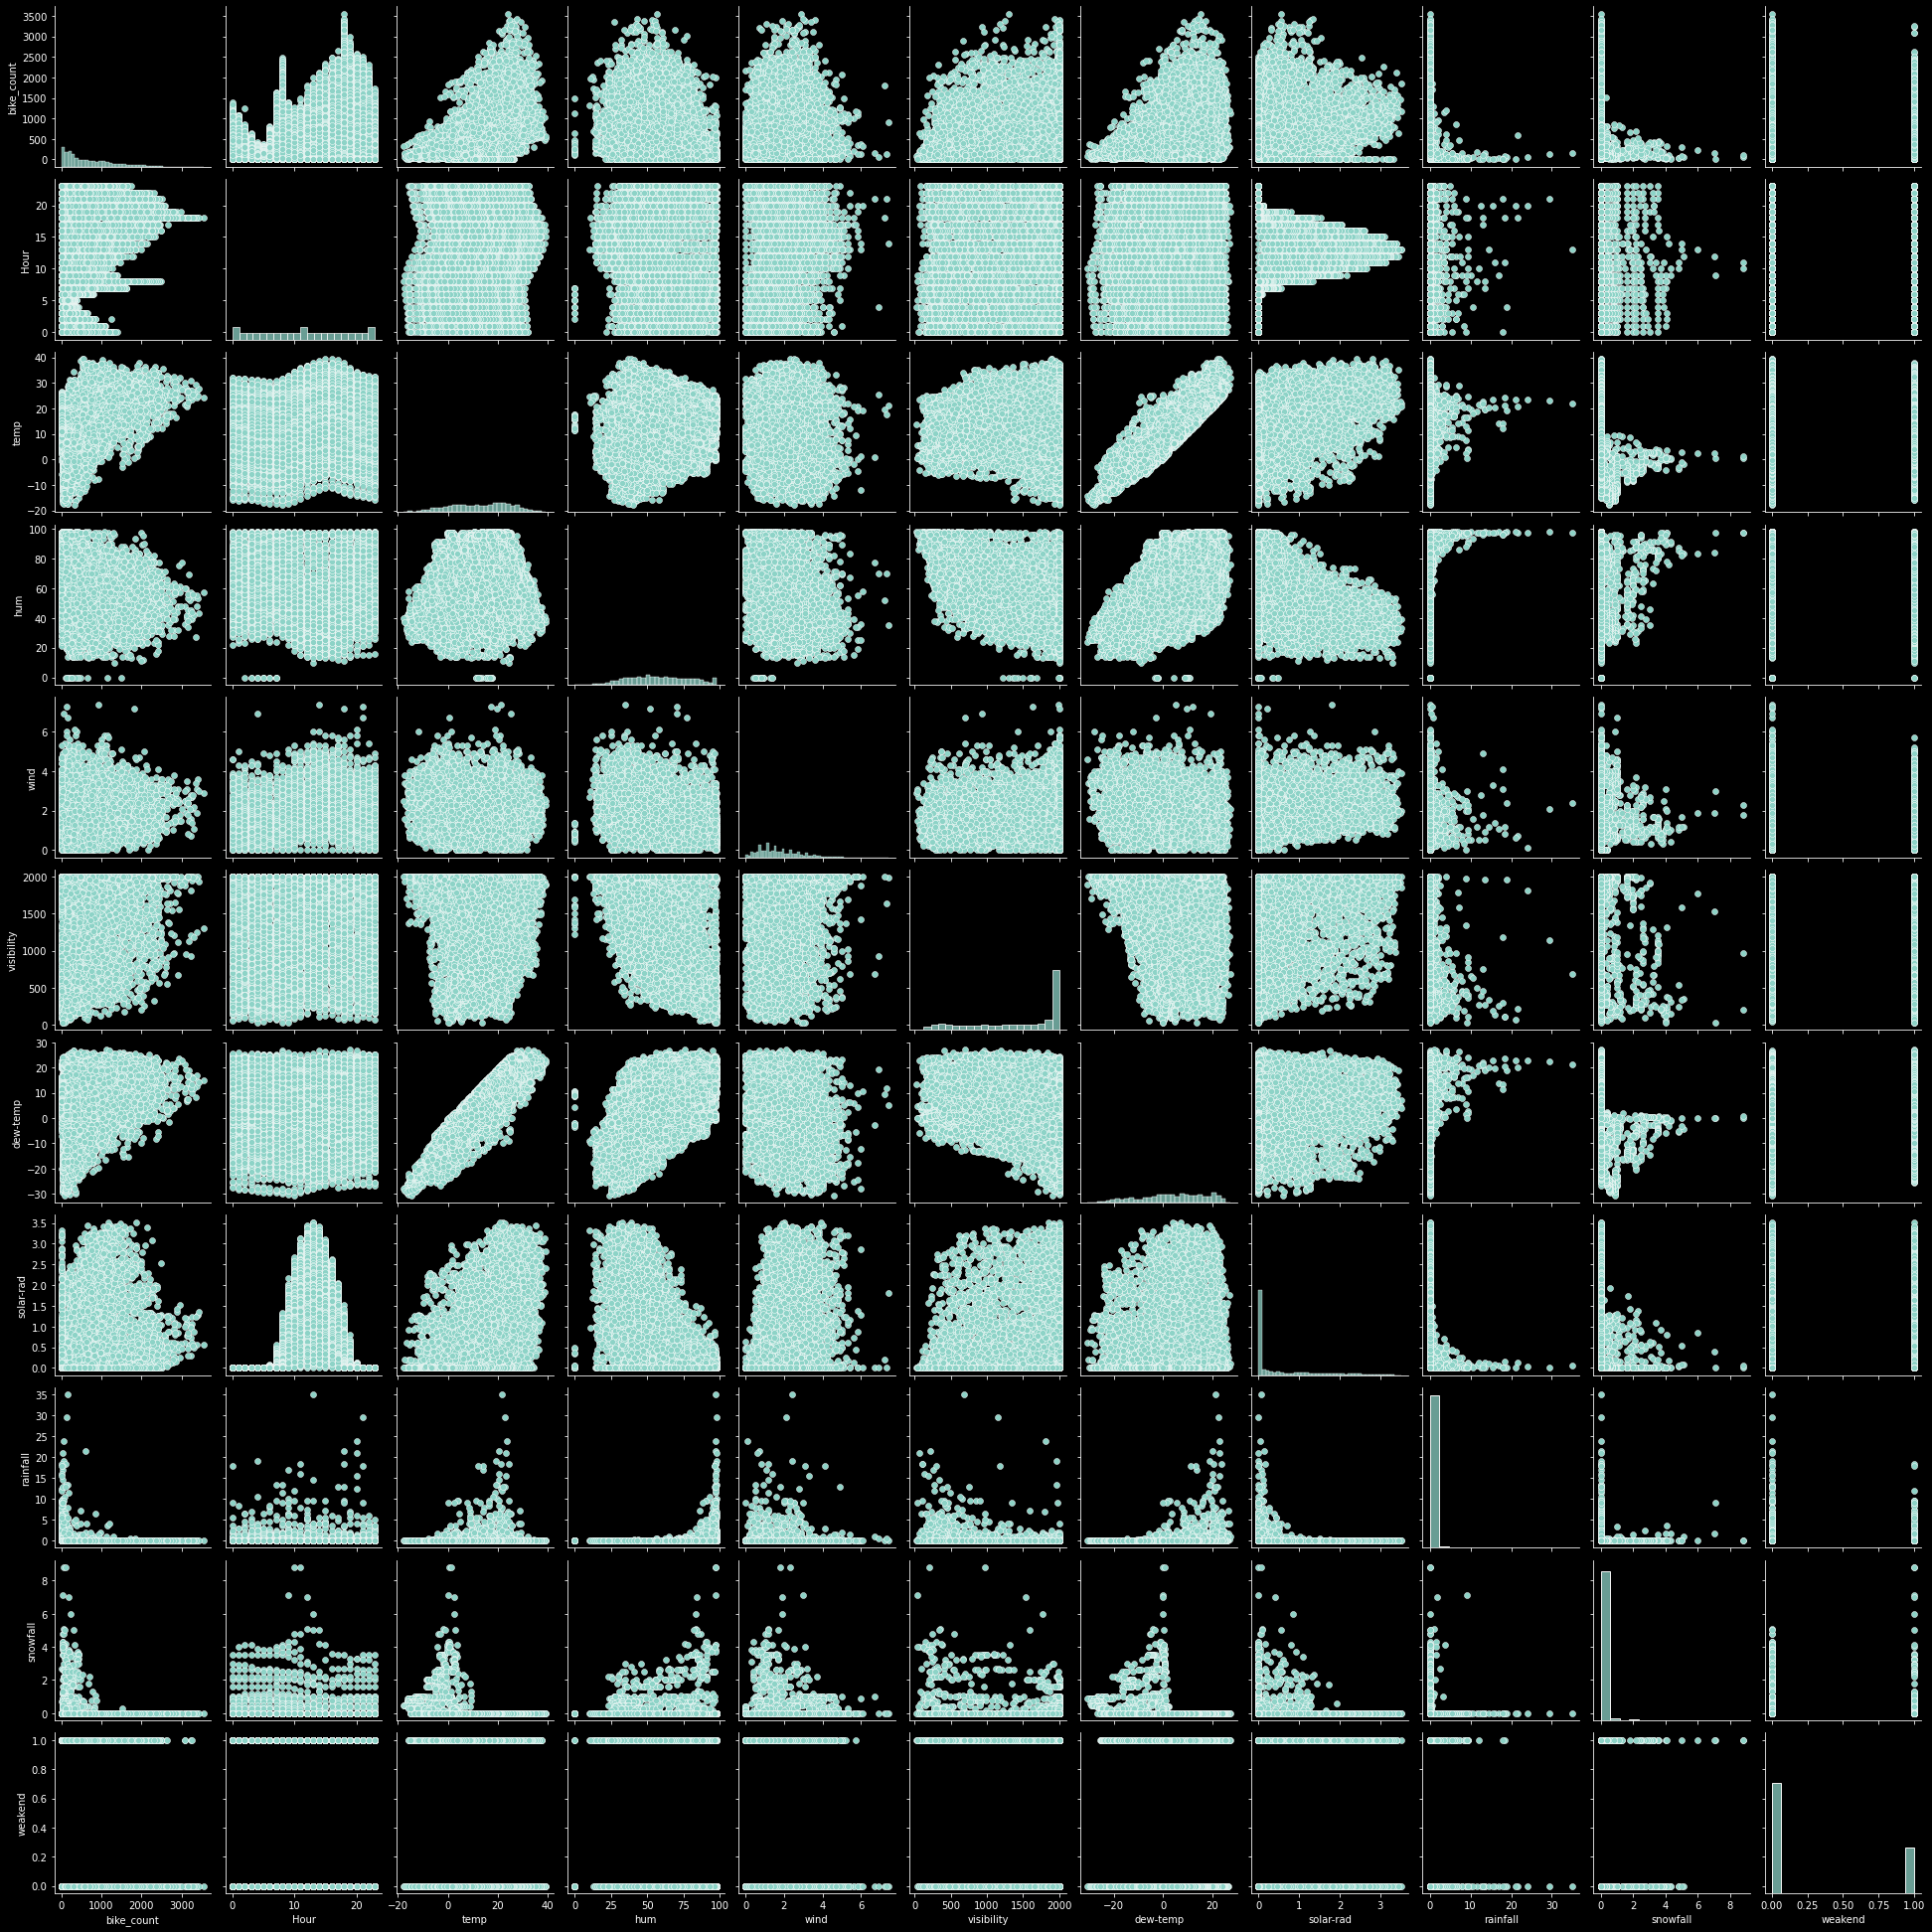

In [16]:
sns.pairplot(data=df)

### ***Analysation of catagorical variable***

### holiday

<AxesSubplot:xlabel='Holiday', ylabel='bike_count'>

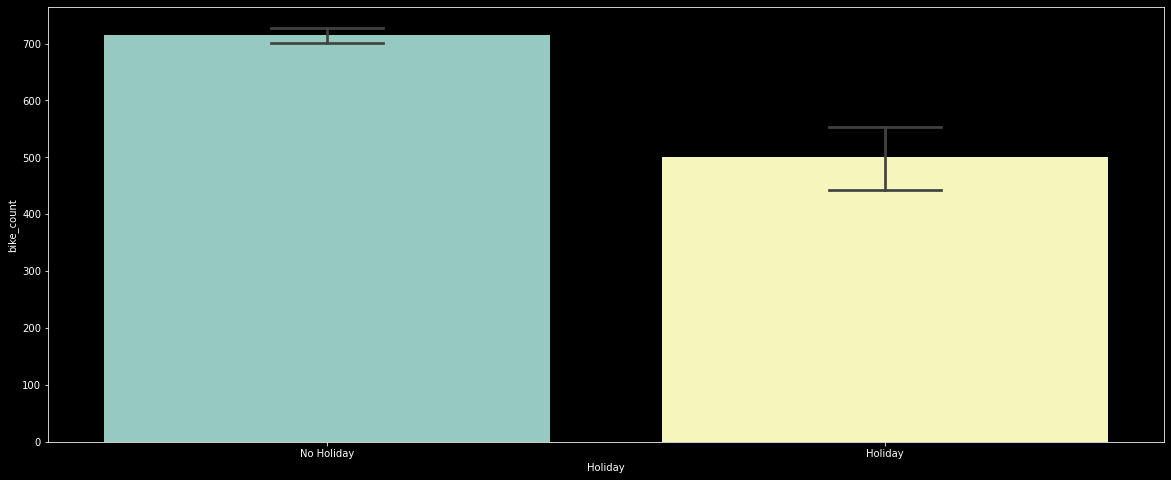

In [17]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x='Holiday',y='bike_count',ax=ax,data=df,capsize=0.2)

Text(0.5, 1.0, 'count of rented bike according to holiday')

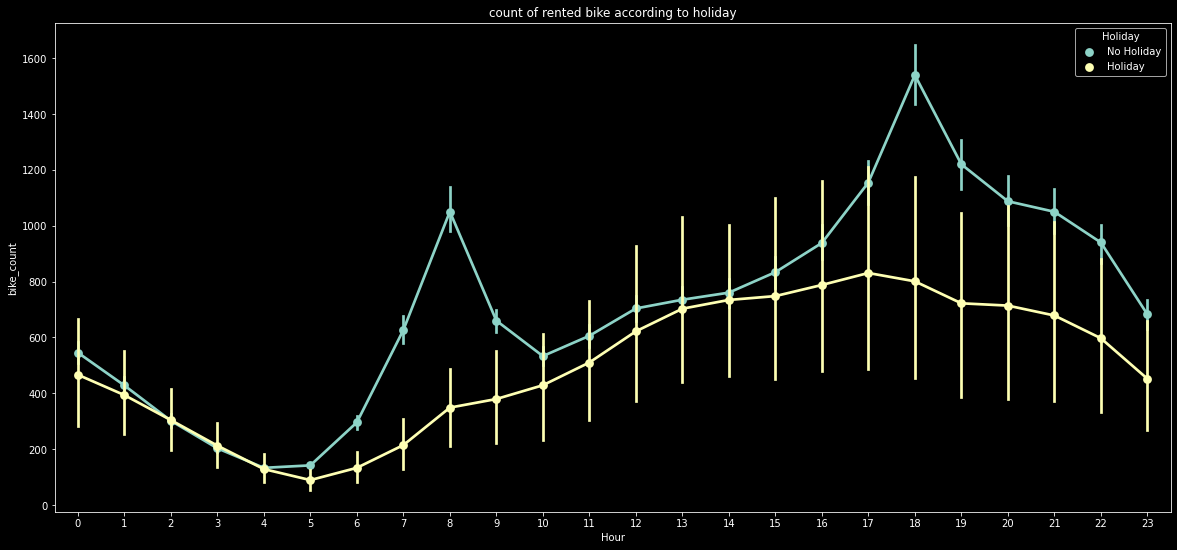

In [18]:
fig,ax=plt.subplots(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',data=df,hue='Holiday')
plt.title('count of rented bike according to holiday')

**In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,**

**plot shows that in holiday people uses the rented bike from 2pm-8pm**

### Season

Text(0.5, 1.0, 'count of rent bike according to Seasons')

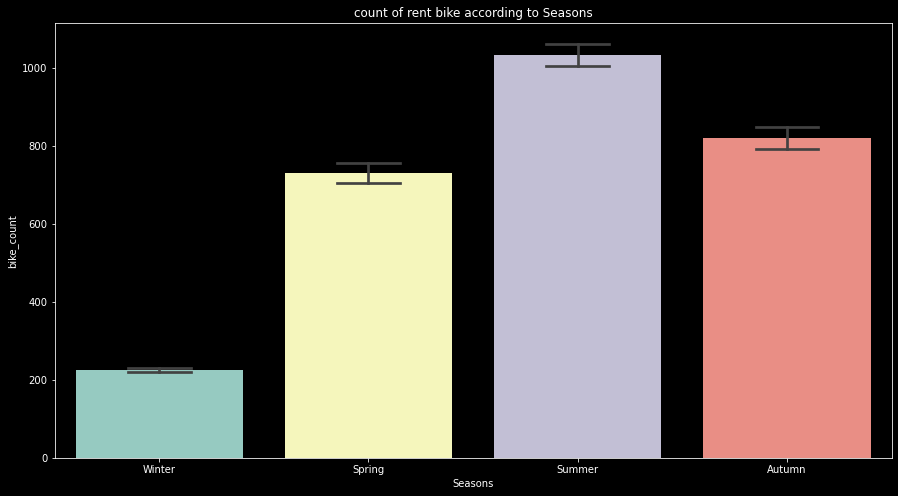

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='Seasons',y='bike_count',capsize=0.3,data=df)
plt.title('count of rent bike according to Seasons')

Text(0.5, 1.0, 'count of rent bike according to Seasons')

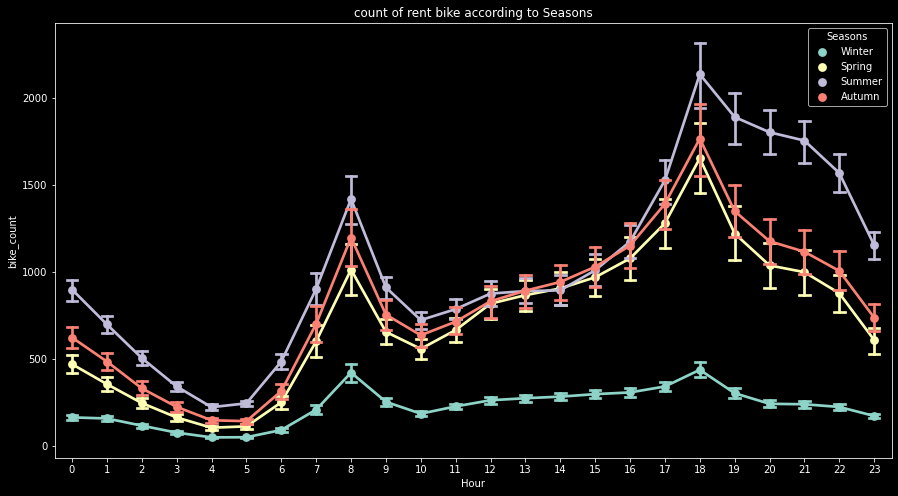

In [20]:
plt.figure(figsize=(15,8))
sns.pointplot(x='Hour',y='bike_count',hue='Seasons',capsize=0.3,data=df)
plt.title('count of rent bike according to Seasons')

**In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,**

**In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.**

**In winter season the use of rented bike is very low because of snowfall.**

### Functioning Day

Text(0.5, 1.0, 'bike rented according to fuctioning day')

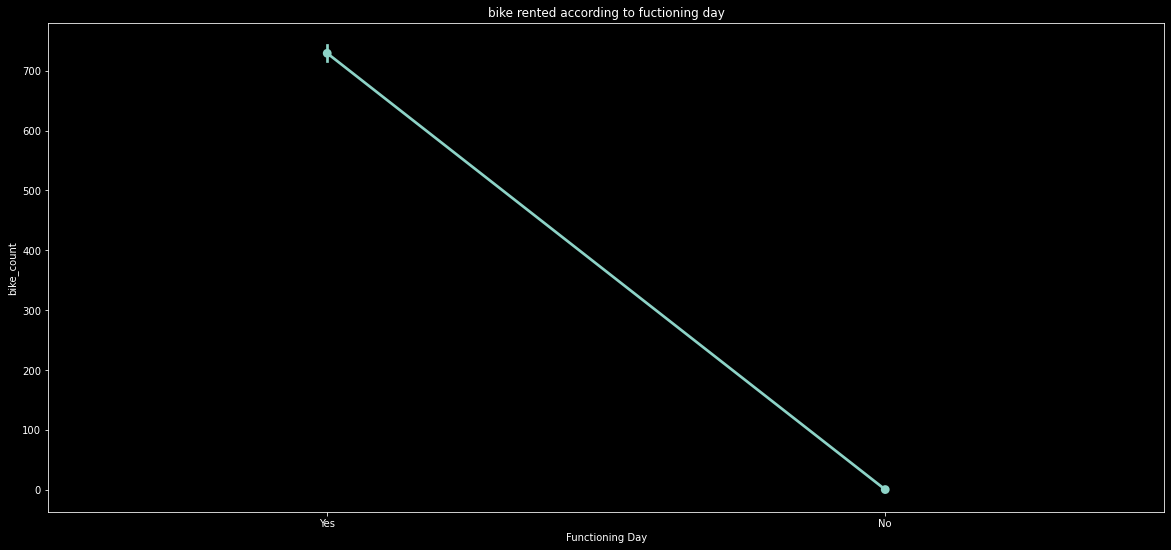

In [24]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Functioning Day',y='bike_count',data=df)
plt.title('bike rented according to fuctioning day')

Text(0.5, 1.0, 'bike rented according to fuctioning day')

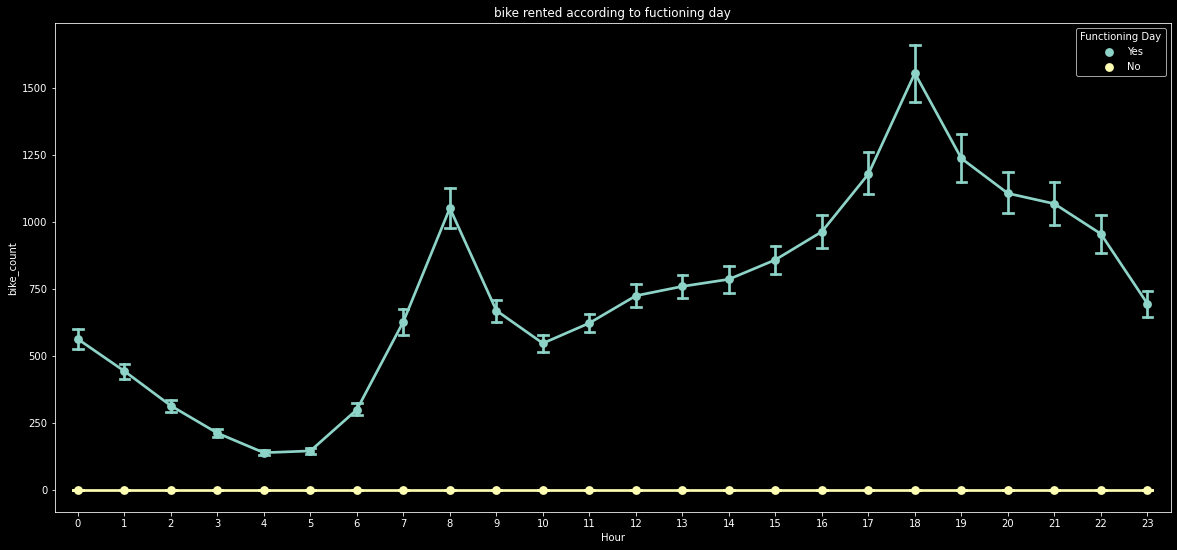

In [22]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',hue='Functioning Day',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')

**In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows 
that,**

**Peoples dont use reneted bikes in no functioning day.**

### day

Text(0.5, 1.0, 'bike rented according to fuctioning day')

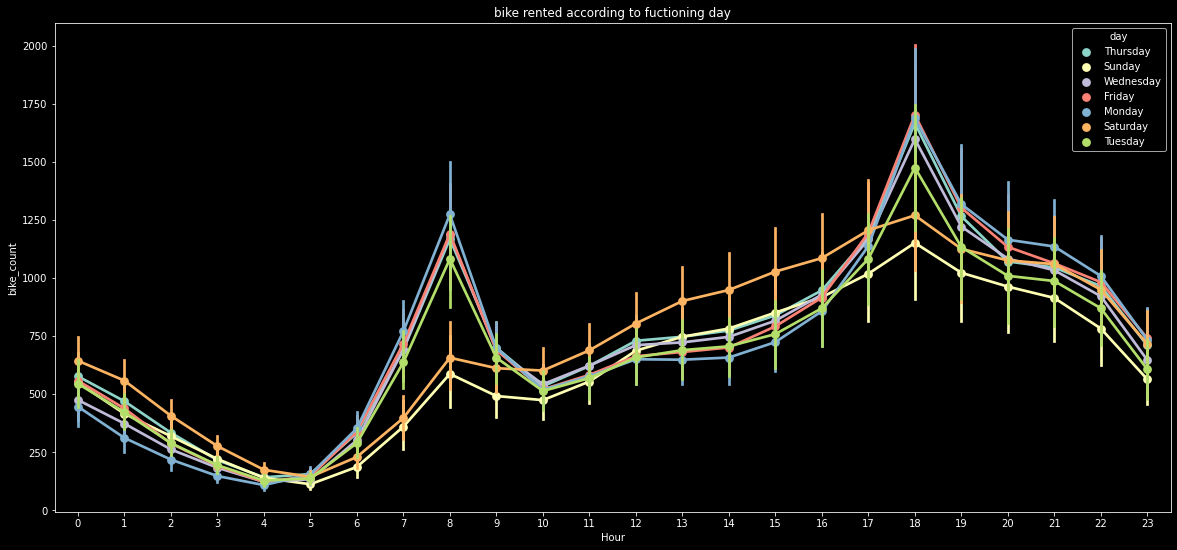

In [23]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',hue='day',data=df)
plt.title('bike rented according to fuctioning day')

Text(0.5, 1.0, 'bike rented according to fuctioning day')

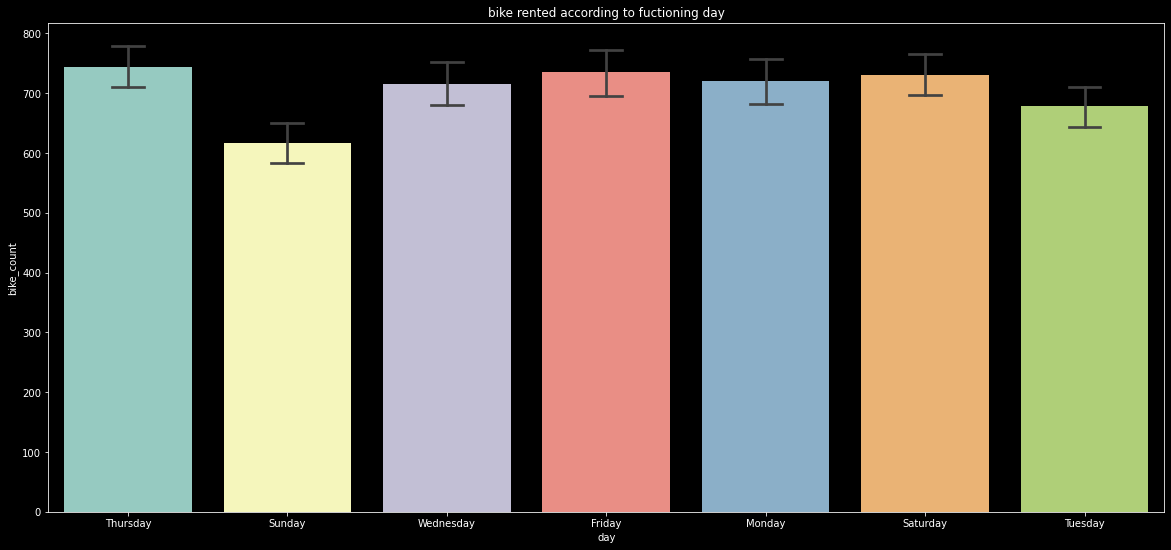

In [24]:
plt.figure(figsize=(20,9))
sns.barplot(x='day',y='bike_count',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')

### months

Text(0.5, 1.0, 'bike rented according to fuctioning day')

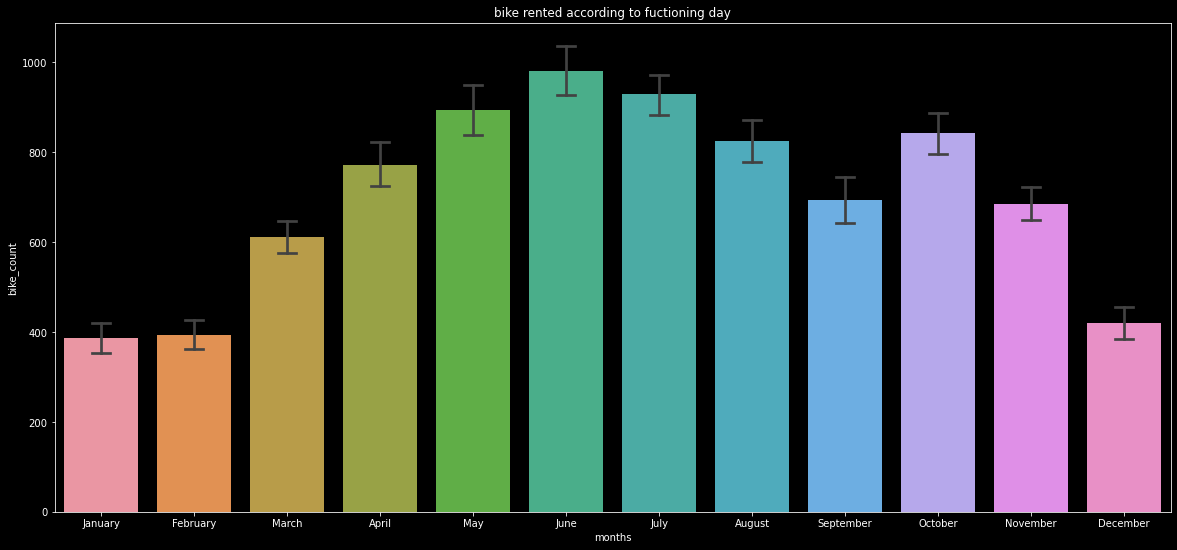

In [25]:
plt.figure(figsize=(20,9))
sns.barplot(x='months',y='bike_count',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')

**From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

Text(0.5, 1.0, 'bike rented according to fuctioning day')

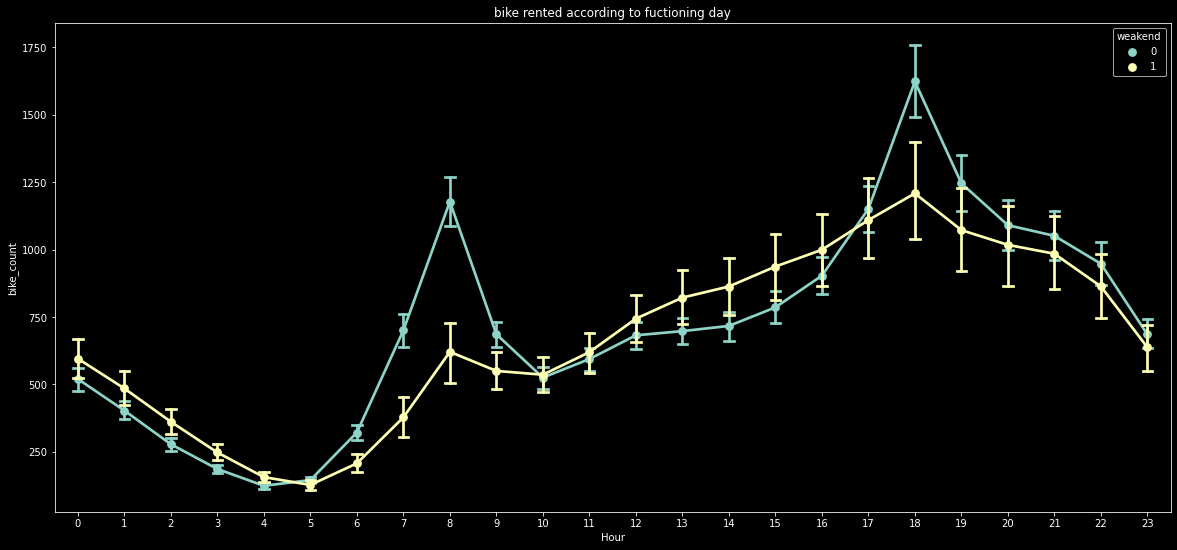

In [26]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',hue='weakend',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')

***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***

In [27]:
cat_cl=[feat for feat in df.columns if df[feat].dtypes=='O']
cat_cl

['Seasons', 'Holiday', 'Functioning Day', 'day', 'months']

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\li

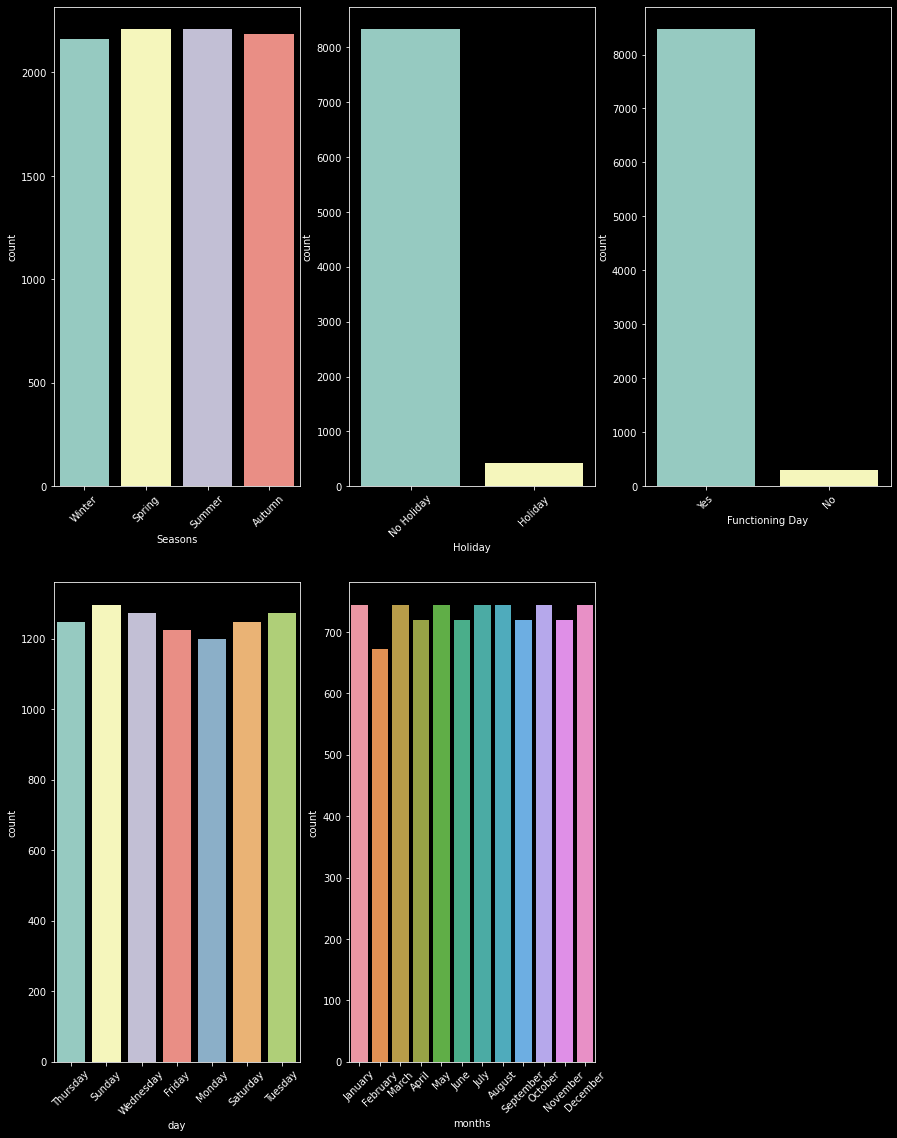

In [28]:

plt.figure(figsize = (15, 30))
for i in enumerate(cat_cl):
    plt.subplot(3, 3,i[0]+1)
    sns.countplot(i[1],  data = df)
    plt.xticks(rotation = 45)

### ***visualisation of numerical variable***

#### analyze of numerical variables boxplots

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\li

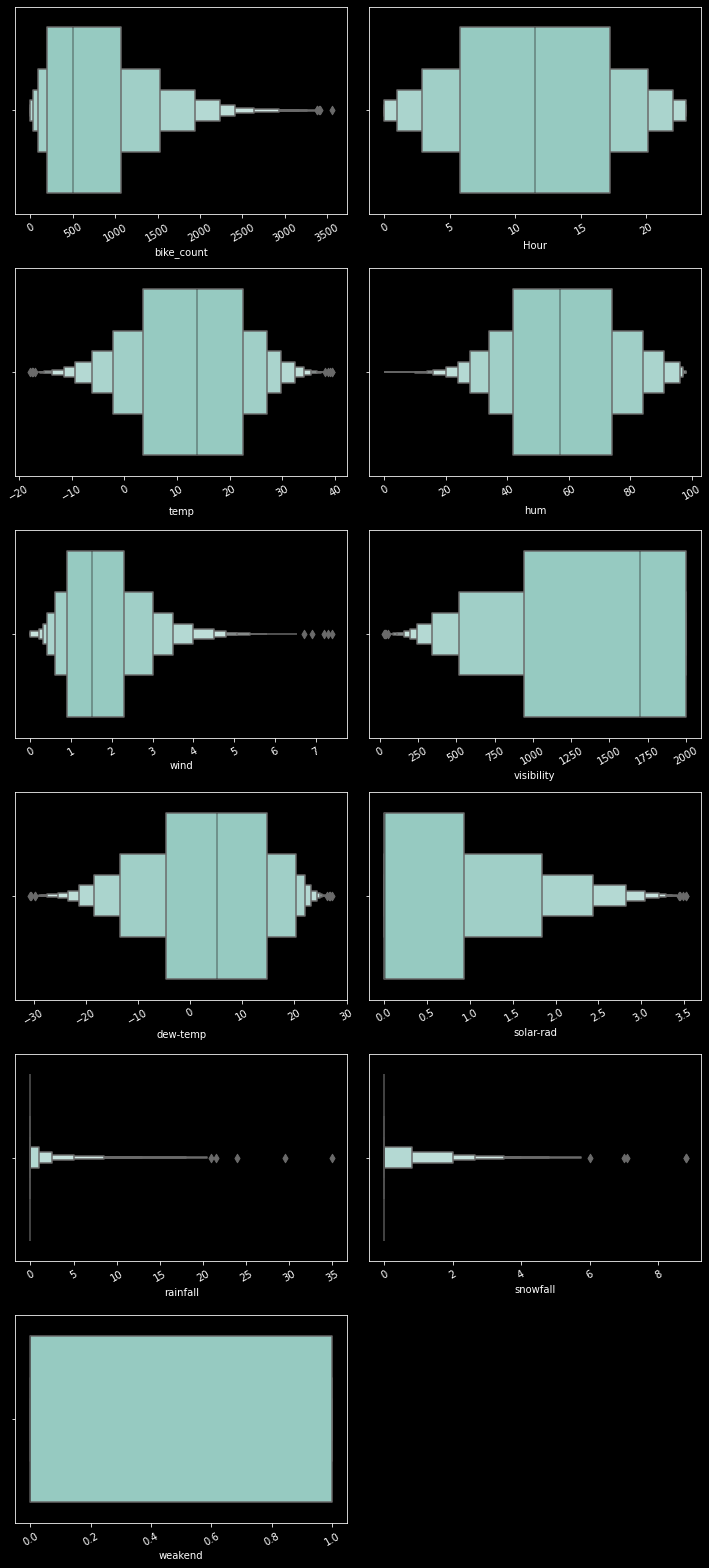

In [29]:
num_col=[feat for feat in df.columns if df[feat].dtypes!='O']

plt.figure(figsize=(10,25))
for i in enumerate(num_col):
    ax=plt.subplot(7,2,i[0]+1)
    sns.boxenplot(i[1],ax=ax,data=df)
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### analyze of numerical variables histplots

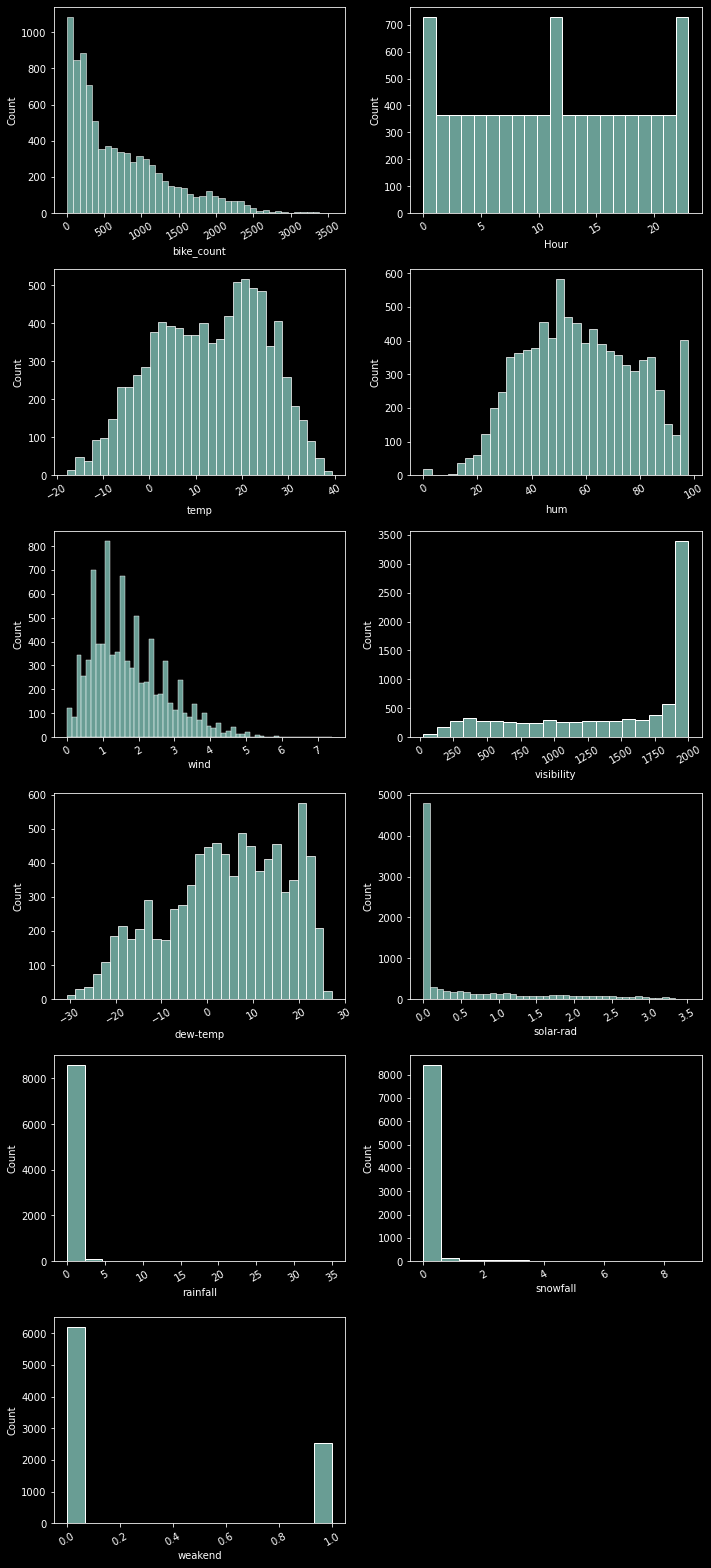

In [30]:
plt.figure(figsize=(10,25))
for i,j in enumerate(num_col):
    ax=plt.subplot(7,2,i+1)
    sns.histplot(df[j],ax=ax)
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### analyze of numerical variables distplots

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

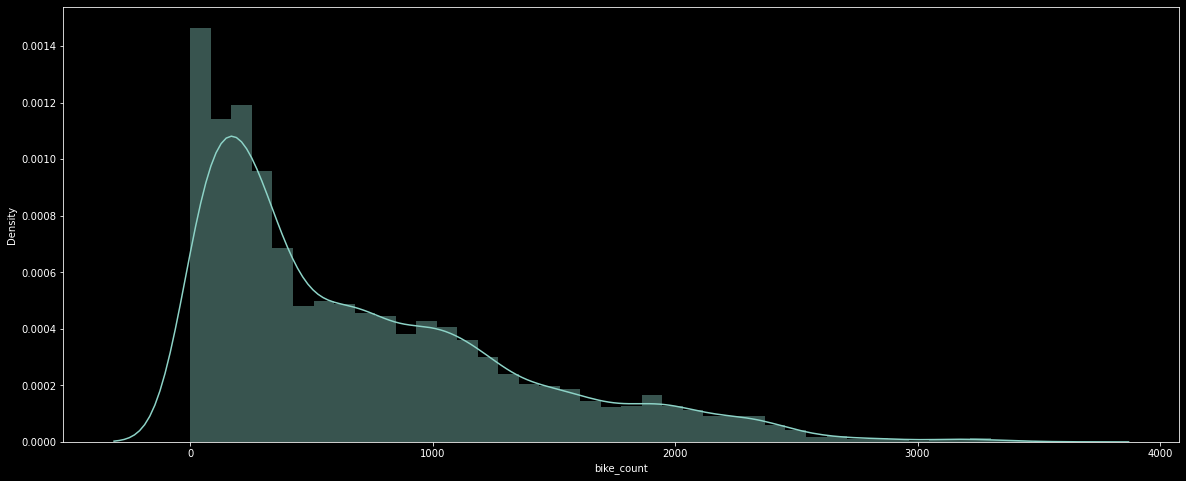

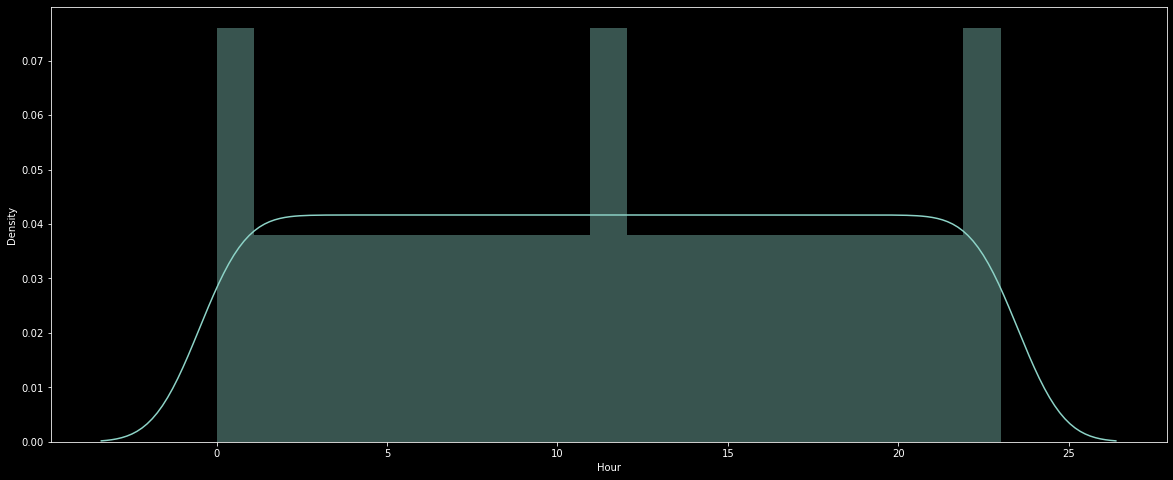

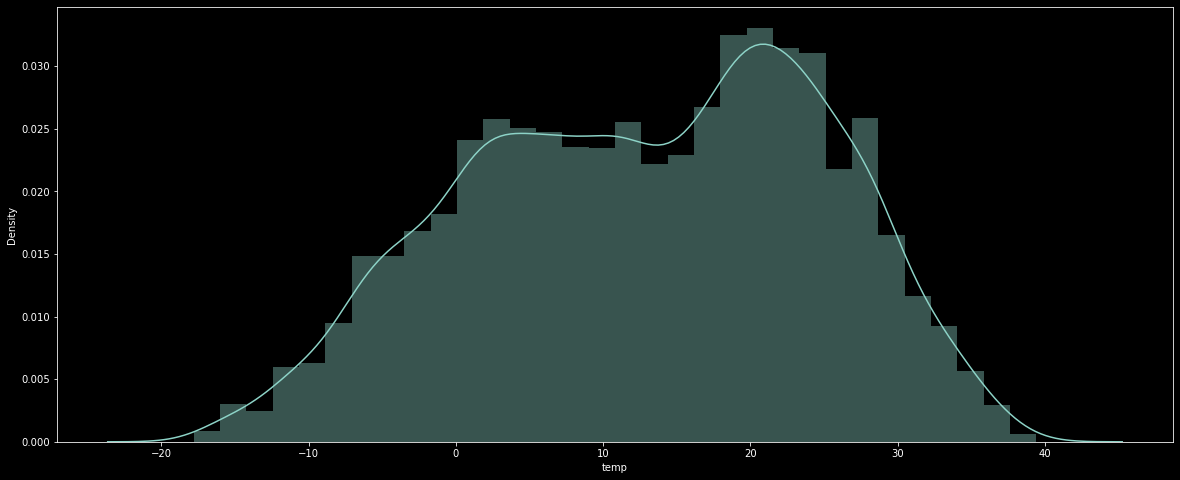

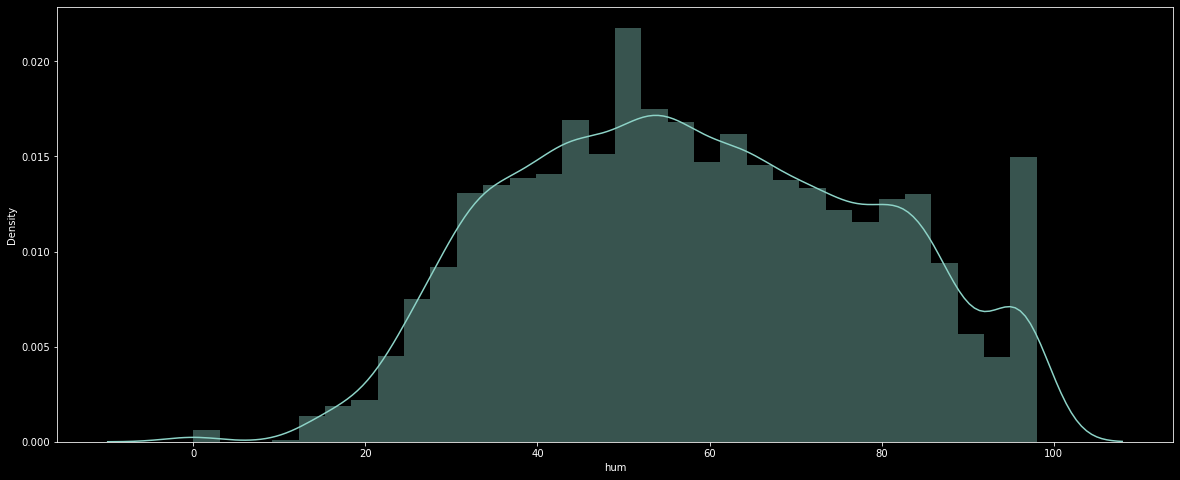

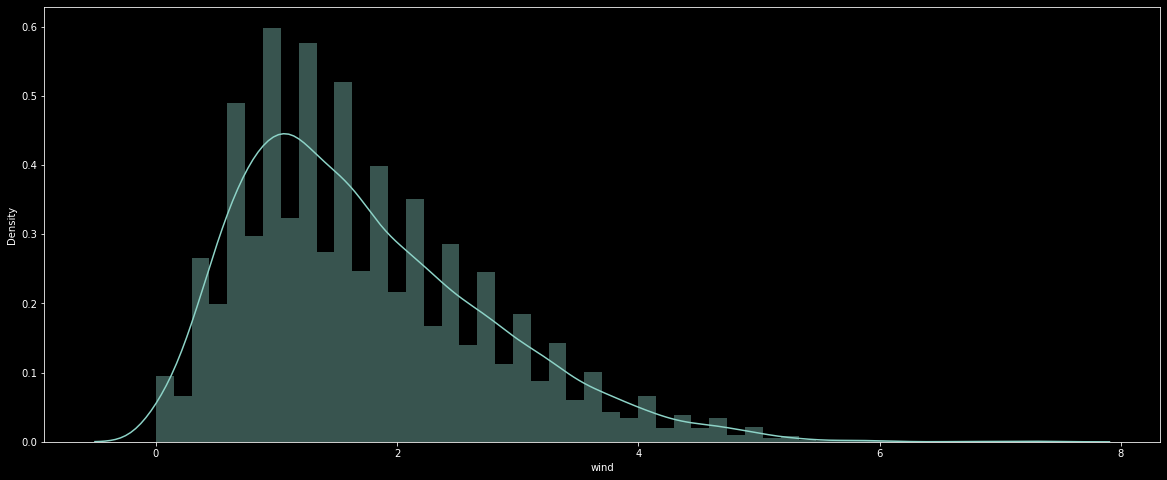

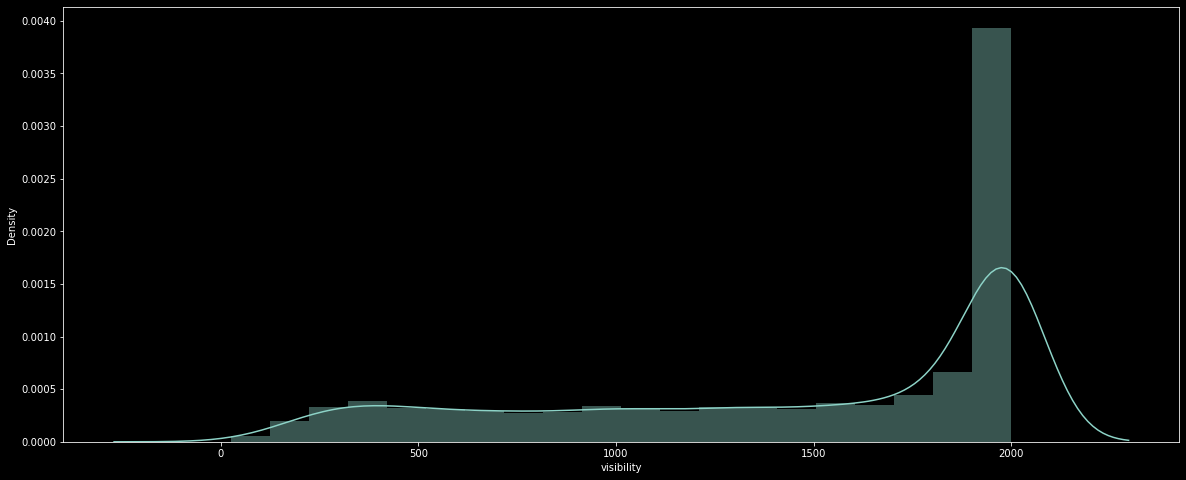

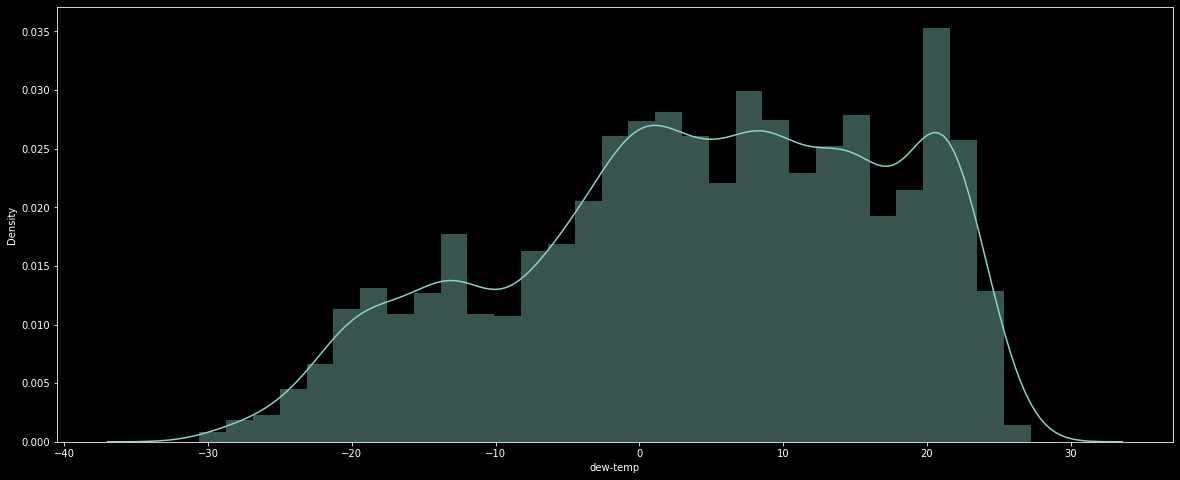

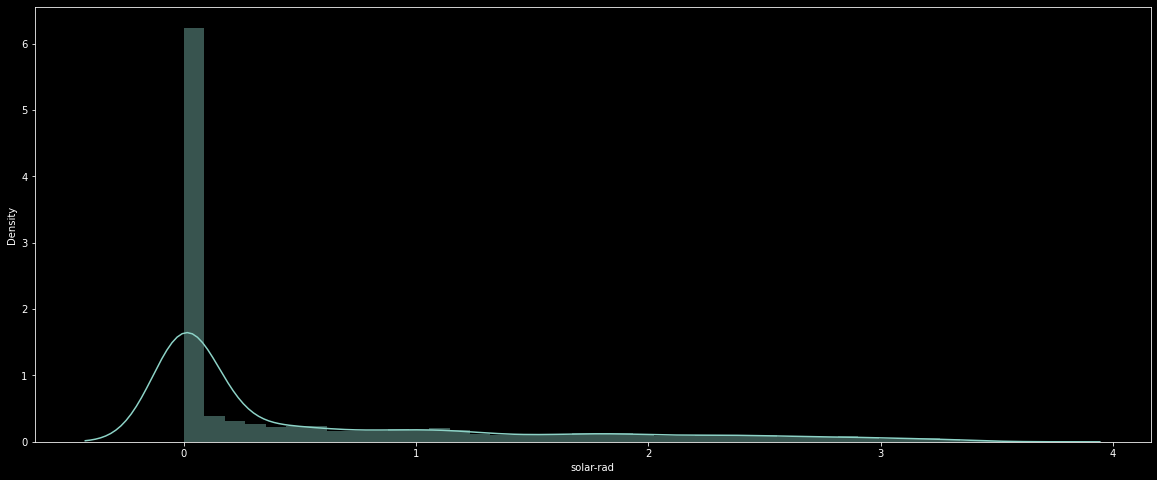

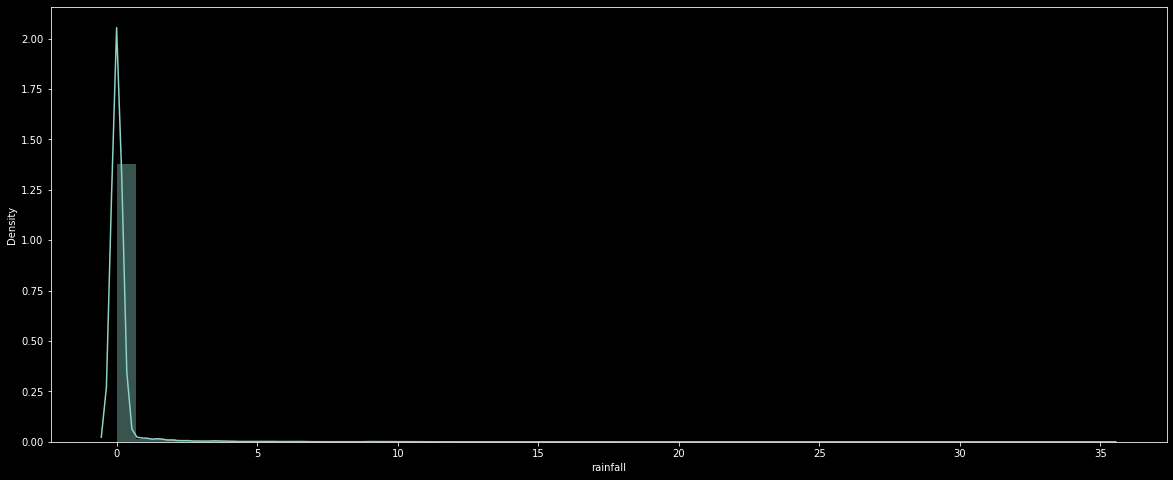

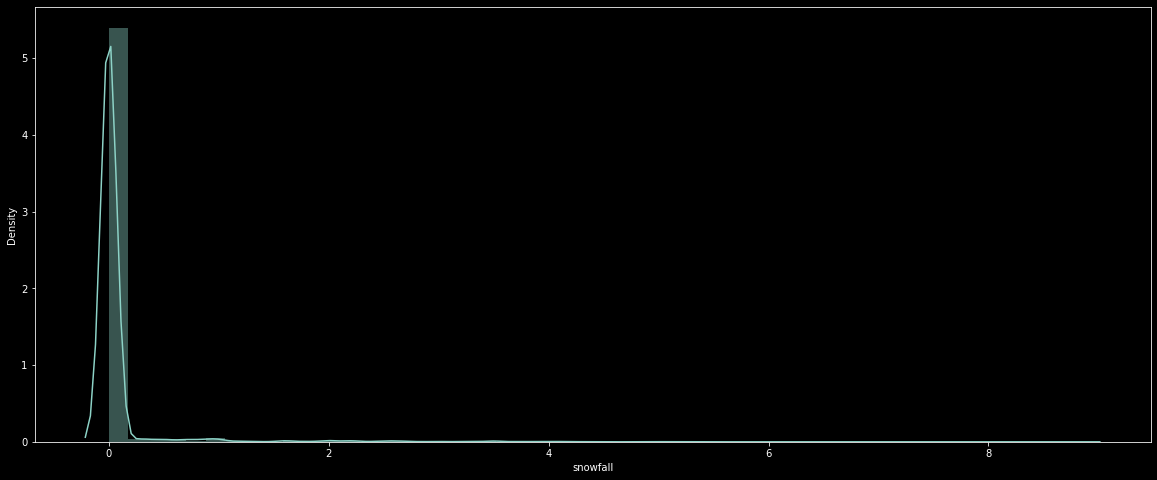

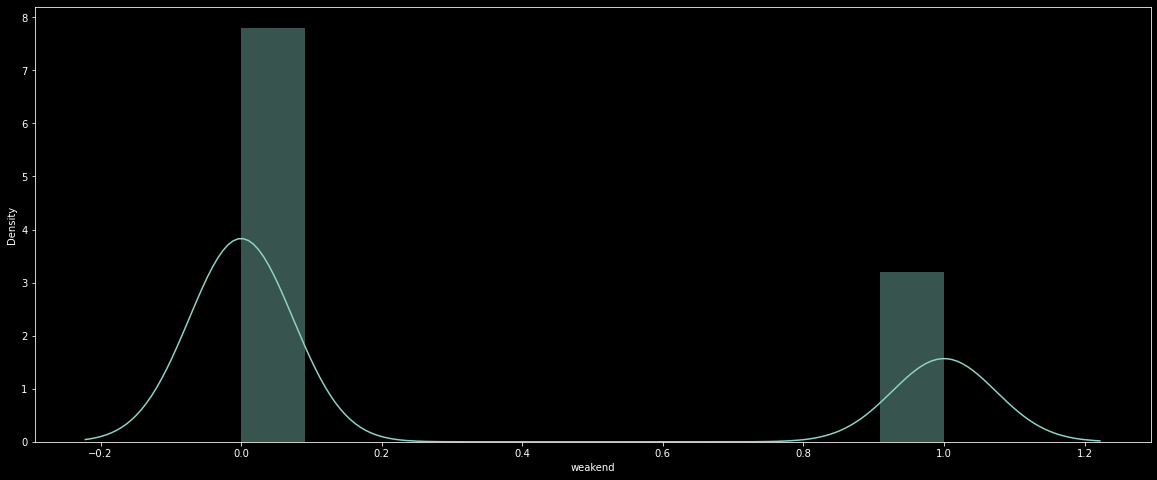

In [31]:
for i in num_col:
    plt.figure(figsize=(20,8))
    sns.distplot(x=df[i])
    plt.xlabel(i)
plt.show()

<AxesSubplot:xlabel='visibility', ylabel='snowfall'>

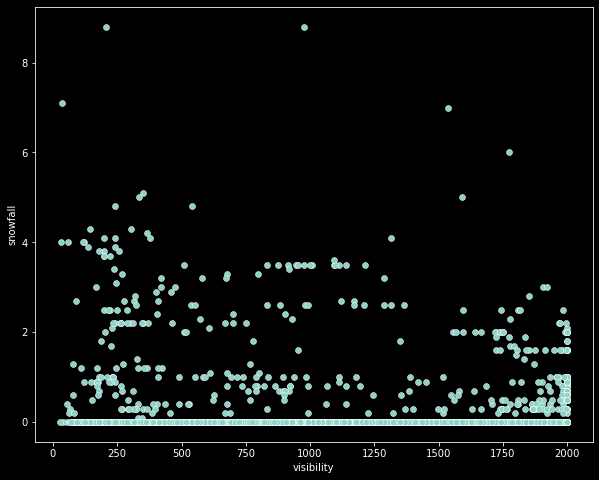

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='visibility',y='snowfall',data=df)

### **visualise the variable with dependent variable**

<AxesSubplot:xlabel='bike_count', ylabel='Hour'>

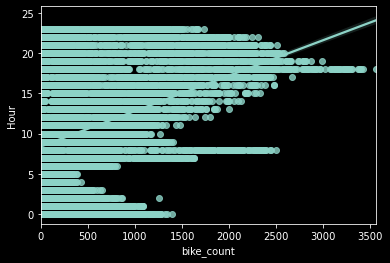

In [33]:
sns.regplot(x='bike_count',y='Hour',data=df)

In [34]:
num_col=[col for col in df.columns if df[col].dtypes!='O' ]
num_col

['bike_count',
 'Hour',
 'temp',
 'hum',
 'wind',
 'visibility',
 'dew-temp',
 'solar-rad',
 'rainfall',
 'snowfall',
 'weakend']

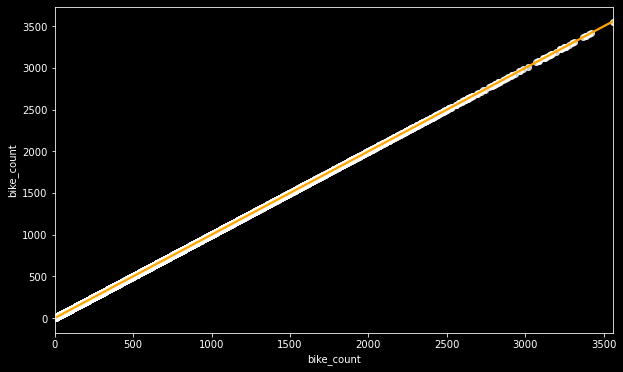

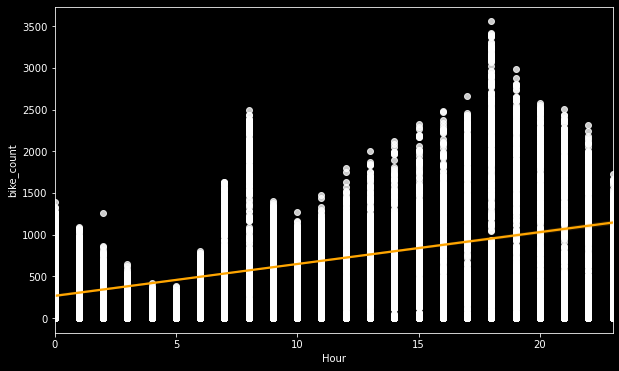

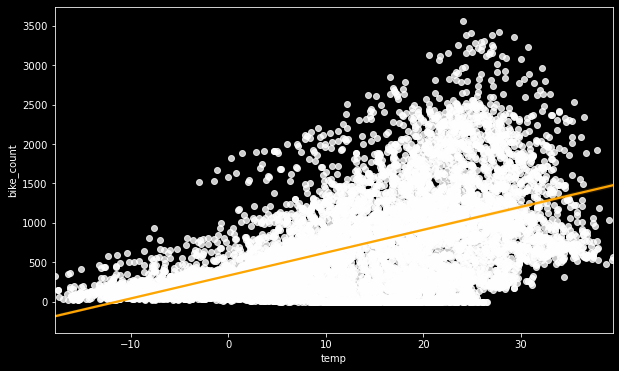

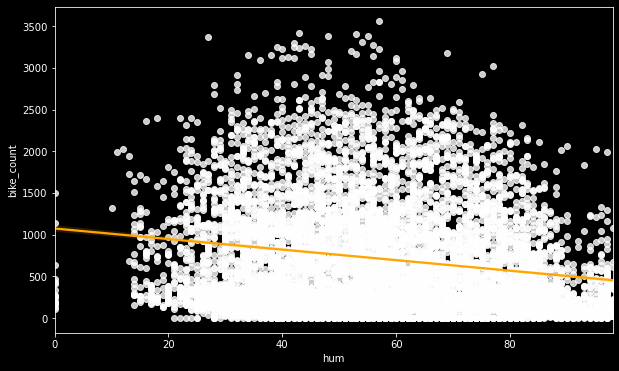

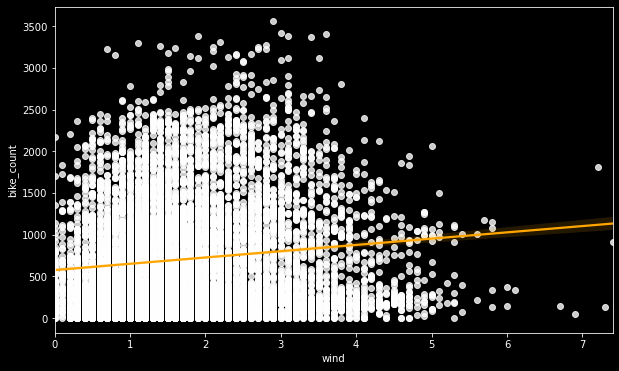

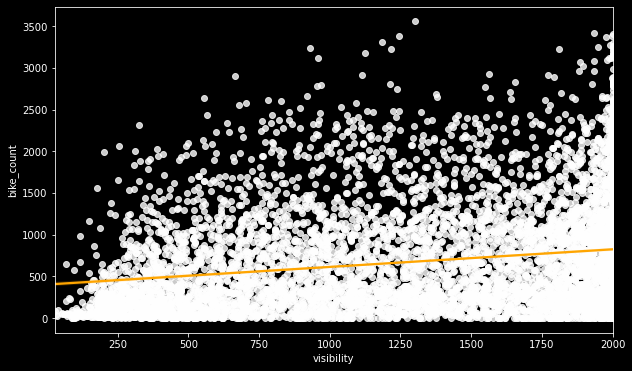

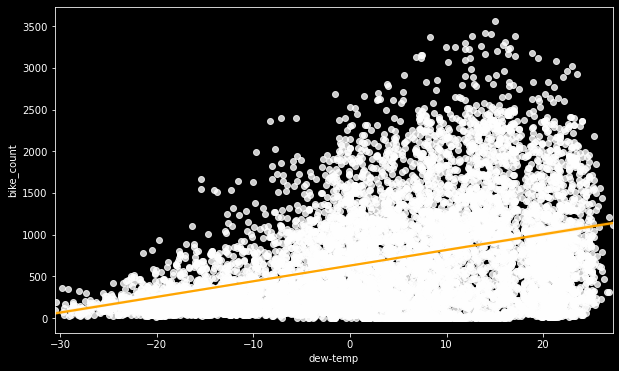

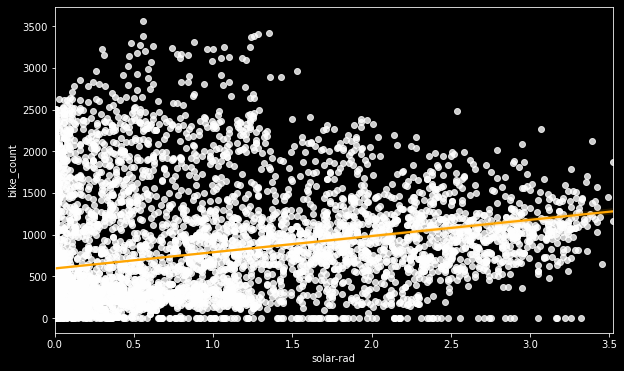

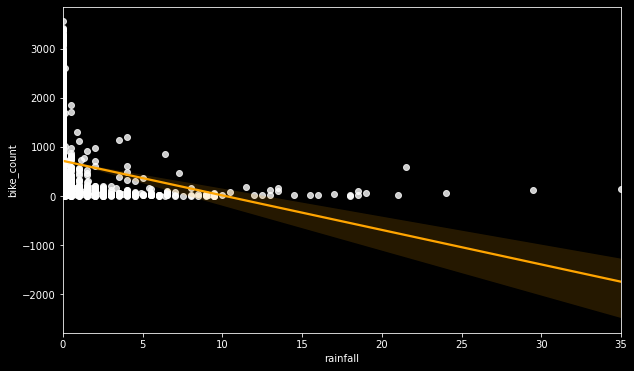

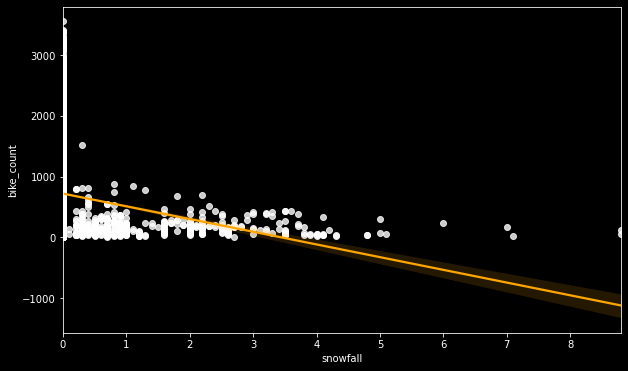

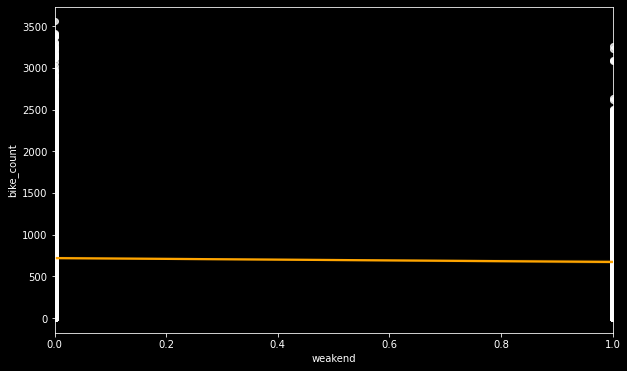

In [35]:
for i in num_col:
    fig,ax=plt.subplots(figsize=(10,6))
    sns.regplot(x=df[i],y=df['bike_count'],scatter_kws={'color':'white'},line_kws={'color':'orange'})

***1 From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***

**2 which means the rented bike count increases with increase of these features.**

**3'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.**

### Numerical vs.Rented_Bike_Count

<AxesSubplot:xlabel='temp'>

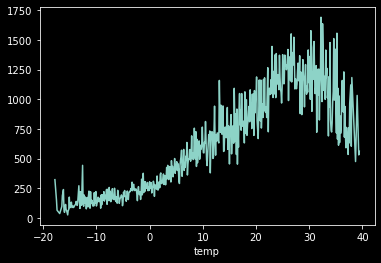

In [25]:
df.groupby("temp").mean()["bike_count"].plot()

***From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average***

<AxesSubplot:xlabel='dew-temp'>

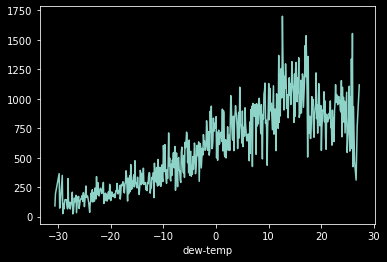

In [26]:
df.groupby('dew-temp').mean()['bike_count'].plot()

**From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.**

### Changing data type


***As "Hour","weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

### one hot encoding on catagorical variable

In [36]:
cols=['Hour','weakend']
for col in cols:
    df[cols]=df[cols].astype('category')
    

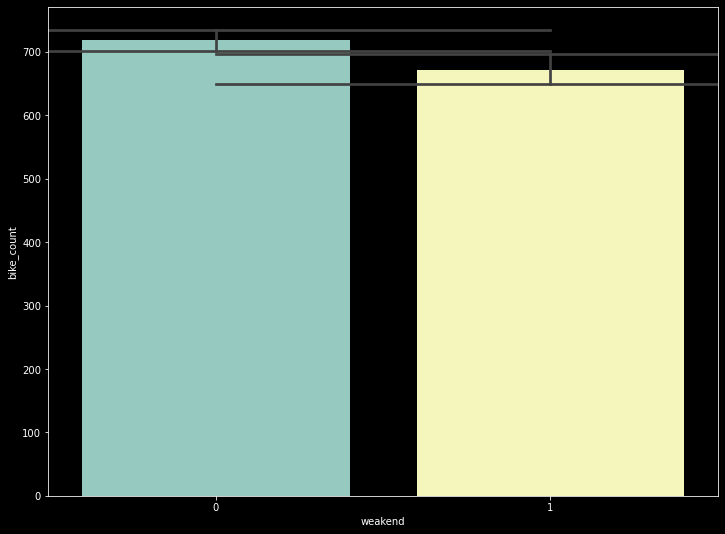

In [37]:
fig,ax=plt.subplots(figsize=(12,9))
sns.barplot(x="weakend",y="bike_count",data=df,ax=ax,capsize=2)
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bike_count       8760 non-null   int64  
 1   Hour             8760 non-null   int64  
 2   temp             8760 non-null   float64
 3   hum              8760 non-null   int64  
 4   wind             8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   dew-temp         8760 non-null   float64
 7   solar-rad        8760 non-null   float64
 8   rainfall         8760 non-null   float64
 9   snowfall         8760 non-null   float64
 10  Seasons          8760 non-null   object 
 11  Holiday          8760 non-null   object 
 12  Functioning Day  8760 non-null   object 
 13  day              8760 non-null   object 
 14  months           8760 non-null   object 
 15  weakend          8760 non-null   int64  
dtypes: float64(6), int64(5), object(5)
memory usage: 1.1+ MB


In [30]:
df_copy=df

In [31]:
df_copy.drop(columns=['dew-temp','day'],axis=1,inplace=True)

In [32]:
cat=list(df_copy.select_dtypes(['object','category']))
cat

['Seasons', 'Holiday', 'Functioning Day', 'months']

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bike_count       8760 non-null   int64  
 1   Hour             8760 non-null   int64  
 2   temp             8760 non-null   float64
 3   hum              8760 non-null   int64  
 4   wind             8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar-rad        8760 non-null   float64
 7   rainfall         8760 non-null   float64
 8   snowfall         8760 non-null   float64
 9   Seasons          8760 non-null   object 
 10  Holiday          8760 non-null   object 
 11  Functioning Day  8760 non-null   object 
 12  months           8760 non-null   object 
 13  weakend          8760 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 958.2+ KB


In [34]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# for i in cat:
#     df_copy[i]=le.fit_transform(df_copy[i])

In [35]:
def get_dummie_(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data=data.drop([column],axis=1)
    return data

In [36]:
for i in cat:
    df_copy=get_dummie_(df_copy,i)
df_copy.head()

bike_count  Hour  temp  hum  wind  visibility  solar-rad  rainfall  \
0         254     0  -5.2   37   2.2        2000        0.0       0.0   
1         204     1  -5.5   38   0.8        2000        0.0       0.0   
2         173     2  -6.0   39   1.0        2000        0.0       0.0   
3         107     3  -6.2   40   0.9        2000        0.0       0.0   
4          78     4  -6.0   36   2.3        2000        0.0       0.0   

   snowfall  weakend  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0       0.0        0               0               0               1   
1       0.0        0               0               0               1   
2       0.0        0               0               0               1   
3       0.0        0               0               0               1   
4       0.0        0               0               0               1   

   Holiday_No Holiday  Functioning Day_Yes  months_August  months_December  \
0                   1                    1              0                0   
1                   1                    1              0                0   
2                   1                    1              0                0   
3                   1                    1              0                0   
4                   1                    1              0                0   

   months_February  months_January  months_July  months_June  months_March  \
0                0               1            0            0             0   
1                0               1            0            0             0   
2                0               1            0            0             0   
3                0               1            0            0             0   
4                0               1            0            0             0   

   months_May  months_November  months_October  months_September  
0           0                0               0                 0  
1           0                0               0                 0  
2           0                0               0                 0  
3           0                0               0                 0  
4           0                0               0                 0

In [37]:
df=df_copy

### Lets split the data for train

In [38]:
x=df.drop(columns='bike_count')
y=np.sqrt(df['bike_count'])

### Train test split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.20)

In [40]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: bike_count, dtype: float64

## Linear regression

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.score(x_test,y_test)

0.6743486960920411

In [43]:
y_pred=lr.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
print('mean square error ',mse)

rmse=np.sqrt(mse)
print('root mean square error',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error',mae)

mean square error  51.070390898675356
root mean square error 7.146355077847403
mean absolute error 5.570251858425586


## Suport Vector Machine

In [45]:
from sklearn.svm import SVR
svm_model=SVR().fit(x_train,y_train)

In [46]:
svm_model.score(x_test,y_test)


0.10282972750817088

In [47]:
y_pred_sv=svm_model.predict(x_test)

In [48]:
mse_svr=mean_squared_error(y_test,y_pred_sv)
print('mean square error ',mse)

rmse_svr=np.sqrt(mse_svr)
print('root mean square error',rmse_svr)

mae_svr=mean_absolute_error(y_test,y_pred_sv)
print('mean absolute error',mae_svr)

mean square error  51.070390898675356
root mean square error 11.861663998310137
mean absolute error 9.710347661408784


## Random forest 

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=150,n_jobs=-1,oob_score=True).fit(x_train,y_train)

In [50]:
y_pred_rfr=rfr.predict(x_test)
print('model score',rfr.score(x_test,y_test))

model score 0.9231343384427027


In [55]:

mse_rfr=mean_squared_error(y_test,y_pred_rfr)
print('mean square error ',mse_rfr)

rmse_rfr=np.sqrt(mse_rfr)
print('root mean square error',rmse_rfr)

mae_rfr=mean_absolute_error(y_test,y_pred_rfr)
print('mean absolute error',mae_rfr)

mean square error  12.054486916858668
root mean square error 3.4719572170259627
mean absolute error 2.2838864386479267


In [72]:
importances = rfr.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()

importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1                  temp                0.28
0                  Hour                0.25
13  Functioning Day_Yes                0.16
2                   hum                0.10
6              rainfall                0.07
11       Seasons_Winter                0.05
5             solar-rad                0.03
9        Seasons_Spring                0.01
8               weakend                0.01
4            visibility                0.01
3                  wind                0.01
18          months_July                0.00
22      months_November                0.00
23       months_October                0.00
21           months_May                0.00
20         months_March                0.00
19          months_June                0.00
12   Holiday_No Holiday                0.00
17       months_January                0.00
16      months_February                0.00
15      months_December                0.00
14        months_August                0.00
10       Seasons_Summer                0.00
7              snowfall                0.00
24     months_September                0.00

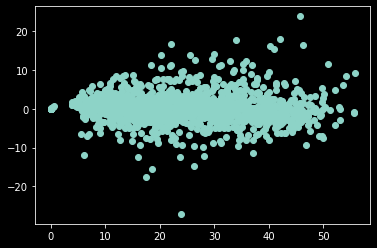

In [54]:
plt.scatter((y_pred_rfr),(y_pred_rfr)-(y_test))

### xgboost with grid searchcv

In [52]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators= 300,min_child_weight= 6,
 max_depth= 7,
 learning_rate= 0.1,
 gamma= 0.0,
 colsample_bytree= 0.7)
xgb.fit(x_train,y_train)
y_pred_x=xgb.predict(x_test)
print(xgb.score(x_test,y_test))

0.9336059673584425


In [59]:
xgb_r=mean_squared_error(y_test,y_pred_x)
xgb_re=np.sqrt(xgb_r)
xgb_ame=mean_absolute_error(y_test,y_pred_x)

print("mean square error",xgb_r)
print("root mean squre error",xgb_re)
print("absolute mean squre error",xgb_ame)

mean square error 10.412269687401924
root mean squre error 3.226804872842782
absolute mean squre error 2.1357668614488117


### Hyperparameter tuning
##### Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

##### Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.



### Using GridSearchCV

#### GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [60]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



In [61]:
parameters = {'n_estimators':[300],
              'learning_rate': [0.05, 0.07,0.1], #so called `eta` value
              'max_depth': [5, 6, 7,8],
              'min_child_weight': [2,4,5,6],
              'gamma':[0.0,0.1,0.2,0.3,0.4],
              'colsample_bytree': [0.5,0.6,0.7]
              }

In [62]:
grid=RandomizedSearchCV(estimator=xgb,param_distributions=parameters,cv=5,n_jobs=-1,verbose=3)

In [63]:

grid.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.7,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0.0,
                                          gpu_id=-1, grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_c...
                                          min_child_weight=6, missing=nan,
                                          monotone_constraints='()',
    

In [64]:
grid.best_params_

{'n_estimators': 300,
 'min_child_weight': 2,
 'max_depth': 8,
 'learning_rate': 0.07,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [65]:
grid.score(x_test,y_test)

0.9357600187761369

In [66]:
grid.best_estimator_



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [67]:
grid.best_index_

6

In [71]:
importances = xgb.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()

importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
13  Functioning Day_Yes                0.53
11       Seasons_Winter                0.18
6              rainfall                0.07
0                  Hour                0.05
1                  temp                0.03
10       Seasons_Summer                0.03
22      months_November                0.01
21           months_May                0.01
20         months_March                0.01
19          months_June                0.01
14        months_August                0.01
12   Holiday_No Holiday                0.01
9        Seasons_Spring                0.01
8               weakend                0.01
5             solar-rad                0.01
2                   hum                0.01
24     months_September                0.01
7              snowfall                0.00
15      months_December                0.00
16      months_February                0.00
17       months_January                0.00
18          months_July                0.00
4            visibility                0.00
3                  wind                0.00
23       months_October                0.00

## CONCLUSION


**During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:**

**• Feature Importance value for Random Forest and XGBOOST Boost are different.**

**• We can deploy this model.**

**However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.**